## Complete Case Analysis


Complete-case analysis (CCA), also called list-wise deletion of cases, consists in simply **discarding** observations where values in any of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in **all** of the variables (Xs). 

CCA can be applied to both categorical and numerical variables.


### Assumptions

CCA works well when the data are missing completely at random (MCAR). In this case, excluding observations with missing data would be the same as randomly excluding some observations from the dataset, given that the missing data are totally at random. 

### Advantages

- Easy to implement
- The same set of data (albeit a reduced set) is used for all analyses (no data manipulation)
- Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

### Disadvantages

-  It can exclude a large fraction of the original sample, which are potentially informative for the analysis
-  CCA will be biased if the complete cases systematically differ from the original sample (e.g. when the missing information is in fact MAR or NMAR: not missing at random).


In practice, CCA may be an acceptable method when the amount of missing information is small. Unfortunately, there is no rule of thumb to determine how much missing data is small or negligible.

In many real life datasets, the amount of missing data is never small, and therefore CCA is typically never an option. 

=============================================================================

For building machine learning models, I would recommend replacing missing values by any of the methods that I will show in future lectures. However, for a quick analysis, if the amount of missing values is not big, this could be the easiest and fastest approach.

===============================================================================

## Real Life example: 

### Predicting Survival on the Titanic: understanding society behaviour and beliefs

Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Predicting Sale Price of Houses

The problem at hand aims to predict the final sale price of homes based on different explanatory variables describing aspects of residential homes. Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

=====================================================================================

In the following cells, I will demonstrate the consequences of complete case analysis on the Titanic and House Price datasets from Kaggle.

If you haven't downloaded the datasets yet, in the lecture "Guide to setting up your computer" in section 1, you can find the details on how to do so.


## Titanic dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# let's load the dataset and check the percentage of missing values per variable

data = pd.read_csv('titanic.csv')
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Assuming that the missing values are totally at random (which are not if you remember from the "Missing Values" lecture in section 3), if we chose to remove all the missing observations, we would end up with a very small dataset, given that Cabin is missing for 77% of the observations. See below.

In [3]:
# let's go ahead and have a look at how many observations we would drop
print('total passengers with values in all variables: ', data.dropna().shape[0])
print('total passengers in the Titanic: ', data.shape[0])
print('percentage of data without missing values: ', data.dropna().shape[0]/ np.float(data.shape[0]))

total passengers with values in all variables:  183
total passengers in the Titanic:  891
percentage of data without missing values:  0.2053872053872054


In fact, we have complete information for only 20% of our observations in the Titanic dataset. Thus, CCA would not be an option for this dataset.

We could however choose to replace the missing values in the variables Age and Cabin by an appropriate method (as I will show in the next lectures), and remove the observations where Embarked is missing. That would be removing only 2 observations from the entire dataset. See below.

In [4]:
# only 2 passengers contain missing data for Embarked. We could safely remove them.

data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Distribution of the dataset after CCA

If we remove the missing observations, because they are not missing completely at random, the new dataset containing the people for whom all the data is available, will be quite different from the original group. See below:

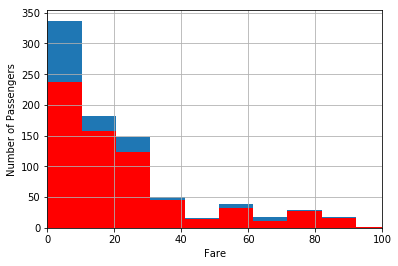

In [5]:
## the following assumes CCA only for the variable Age
# I will plot the distribution of Fare

fig = plt.figure()
ax = fig.add_subplot(111)
data.Fare.hist(bins=50, ax=ax) # histogram original dataset
data.dropna(axis=0, subset=['Age'])['Fare'].hist(bins=50, ax=ax, color='red') # histogram cca on Age
ax.set_xlim(0,100)
ax.set_xlabel('Fare')
ax.set_ylabel('Number of Passengers')

Comparing the red and blue histograms we can observe that the distribution of the entire dataset do not match that one of the dataset after CCA. There are a lot of people for whom Age is missing, that paid lower fares to get on the titanic.

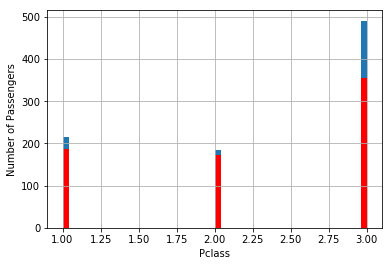

In [6]:
## the following assumes CCA only for the variable Age
# I will plot the distribution of Class

fig = plt.figure()
ax = fig.add_subplot(111)
data.Pclass.hist(bins=50, ax=ax)
data.dropna(axis=0, subset=['Age'])['Pclass'].hist(bins=50, ax=ax, color='red')
ax.set_xlabel('Pclass')
ax.set_ylabel('Number of Passengers')

Similarly, the original dataset shows a higher proportion of people that travelled n class 3. In other words, the dataset contains less missing Age values for people travelling in Class 3. 

Given that the distribution of the variables between the original dataset and that one after CCA are not equivalent, CCA is not a good option. Our conclusions would be biased towards the population with complete observations. 


### House Sale Dataset

In [7]:
# let's load the House Sale Price dataset with a few columns and calculate the percentage of missing values

data = pd.read_csv('houseprice.csv')

# make a dataframe with the missing values per variable
data_na = data.isnull().mean()
data_na = pd.DataFrame(data_na.reset_index())
data_na.columns = ['variable', 'na_percentage']
data_na.head()

,variable,na_percentage
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.000000
3,LotFrontage,0.177397
4,LotArea,0.000000


In [8]:
# let's select those columns where there are missing values
data_na[data_na.na_percentage!=0].head()

,variable,na_percentage
3,LotFrontage,0.177397
6,Alley,0.937671
25,MasVnrType,0.005479
26,MasVnrArea,0.005479
30,BsmtQual,0.025342


In [9]:
print('total number of columns: ', data_na.shape[0])
print('columns with NA: ', data_na[data_na.na_percentage!=0].shape[0])
print('total observations with complete data: ', data.dropna().shape[0])

total number of columns:  81
columns with NA:  19
total observations with complete data:  0


Approximately 25 % of the columns contain missing data, and in fact, no observation in the dataset contains no NA in any of the columns. So Complete Case Analysis is not an option. This is probably due to the fact that some columns like Alley are practically empty (contain only NA). See below.

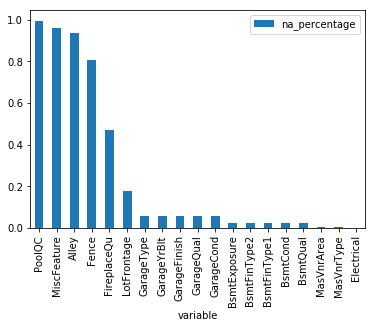

In [10]:
data_na.index = data_na['variable']
data_na[data_na.na_percentage!=0].sort_values(by='na_percentage', ascending=False).plot.bar()

We see in this plot that there are a few variables in which the percentage of missing values is very small (<5%). If we were to study only those variables, or build machine learning models with only those variables, perhaps removing the observations with missing values wouldn't cause to much of a set-back.

However, there are 4 variables for which most of the values are missing. Therefore CCA is not an option on the entire dataset. 

The debate would be whether those variables with > 90% NA are informative at all. That is something that we would know by investigating the relationship of those variables with the target, in this case, SalePrice.

In [11]:
# Let's look at another variable
# there is only one missing value for this variable, so we could potentially remove it
data[data.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


### Conclusion

In datasets with many variables that contain missing data, CCA will typically not be an option as it will render a reduced dataset with complete observations. However, if only a subset of the variables from the dataset will be used, we could evaluate variable by variable, whether we choose to discard values with NA, or to replace them with other methods.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**